In [0]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
retail_data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [0]:
retail_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [0]:
retail_data['Invoice ID'].nunique()

1000

In [0]:
retail_data['date'] = pd.to_datetime(retail_data['Date'])

In [0]:
retail_data['date'].dtype

dtype('<M8[ns]')

In [0]:
type(retail_data['date'])

pandas.core.series.Series

In [0]:
retail_data['date'] = pd.to_datetime(retail_data['date'])

In [0]:
retail_data['day'] = (retail_data['date']).dt.day

In [0]:
retail_data['month'] = (retail_data['date']).dt.month

In [0]:
retail_data['year'] = (retail_data['date']).dt.year

In [0]:
retail_data['Time'] = pd.to_datetime(retail_data['Time'])

In [0]:
 retail_data['Hour'] = (retail_data['Time']).dt.hour

In [0]:
retail_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,day,month,year,Hour
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000,1000.000000,1000.0,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,15.256000,1.993000,2019.0,14.910000
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.220360e-14,11.708825,1.71858,8.693563,0.835254,0.0,3.186857
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,1.000000,1.000000,2019.0,10.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,8.000000,1.000000,2019.0,12.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,15.000000,2.000000,2019.0,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,23.000000,3.000000,2019.0,18.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,31.000000,3.000000,2019.0,20.000000


Text(0.5, 1.0, 'Ratings by Branch')

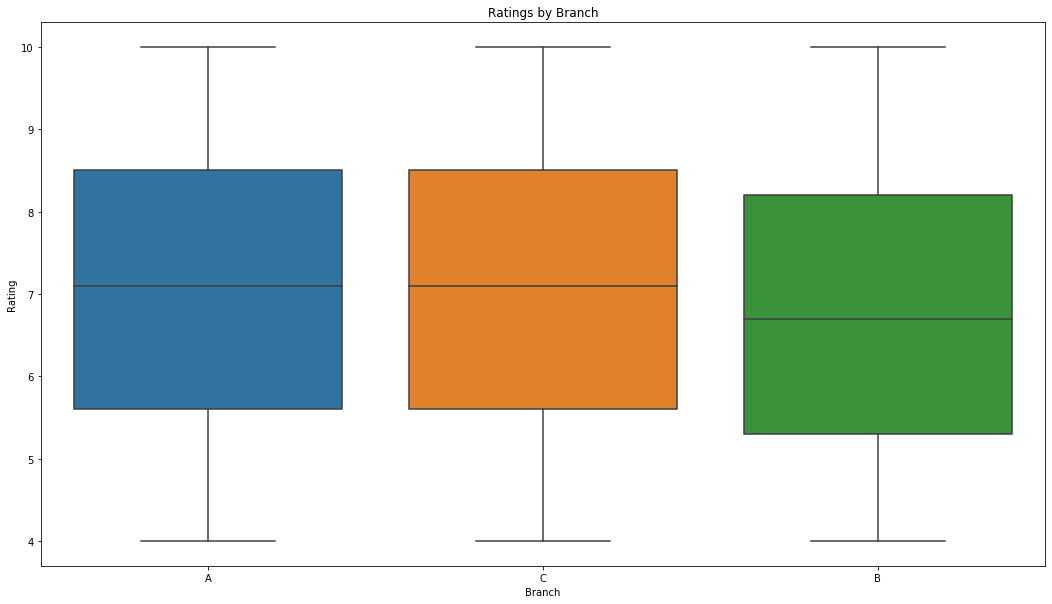

In [0]:
 sns.boxplot(x='Branch', y = 'Rating' ,data =retail_data).set_title('Ratings by Branch') 

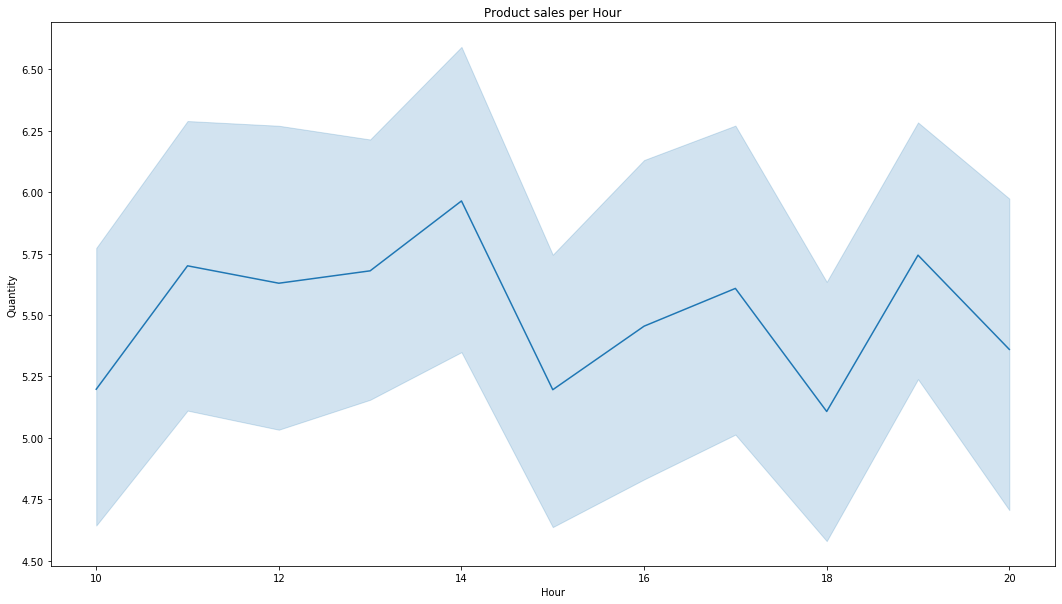

In [0]:
Product_Count  = sns.lineplot(x='Hour',  y = 'Quantity',data =retail_data).set_title('Product sales per Hour')

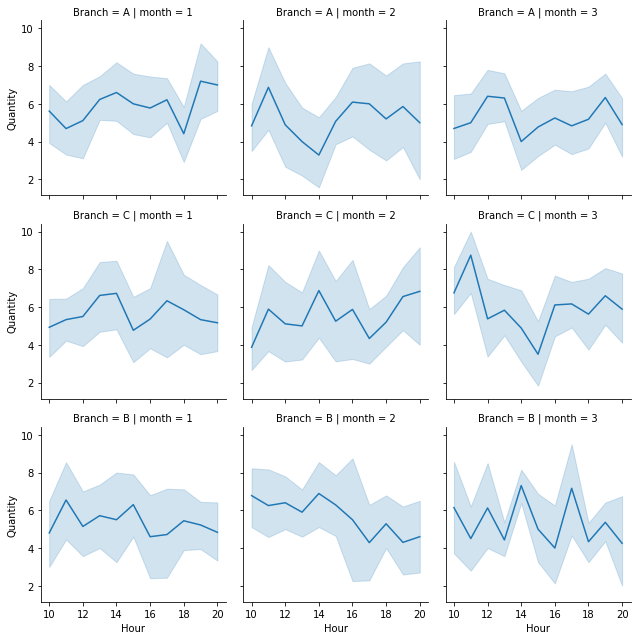

In [0]:
Product_Count  = sns.relplot(x='Hour',  y = 'Quantity', col= 'month' , row= 'Branch', kind='line', data =retail_data, height=3, aspect=1)

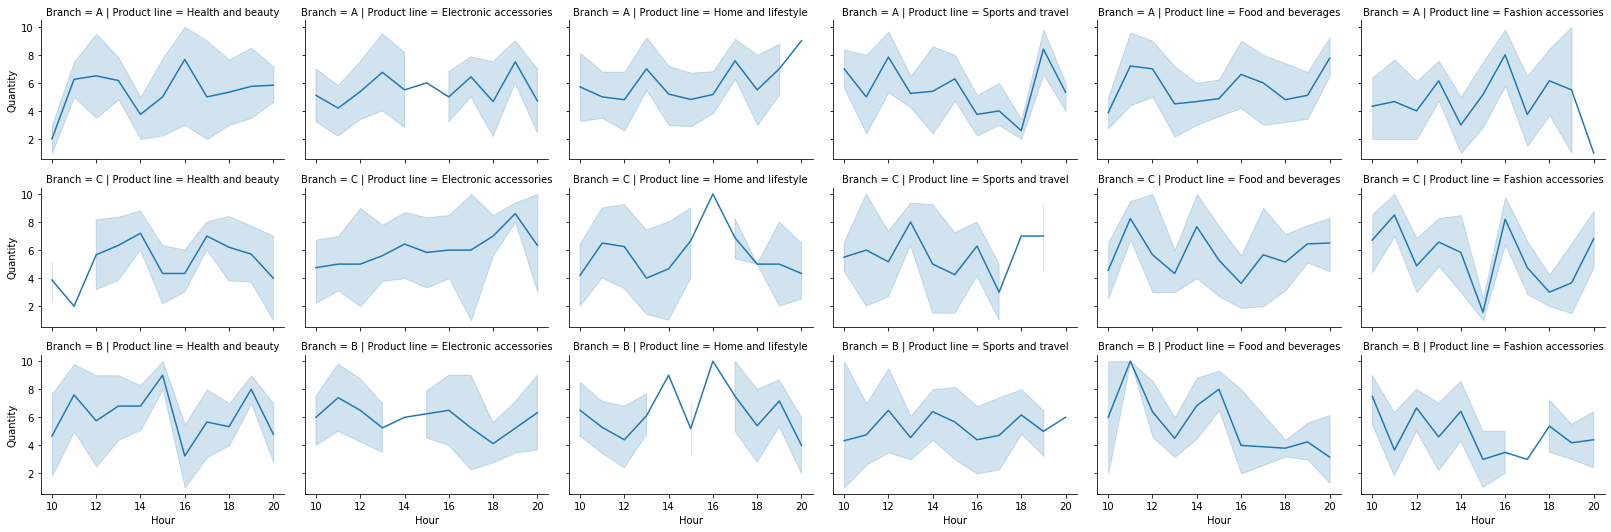

In [0]:
Product_Count  = sns.relplot(x='Hour',  y = 'Quantity', col= 'Product line' , row= 'Branch', kind='line', data =retail_data, height=2.5, aspect=1.5)

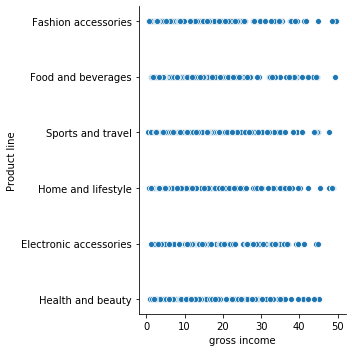

In [0]:
sns.relplot(y = 'Product line', x = 'gross income', data=retail_data )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

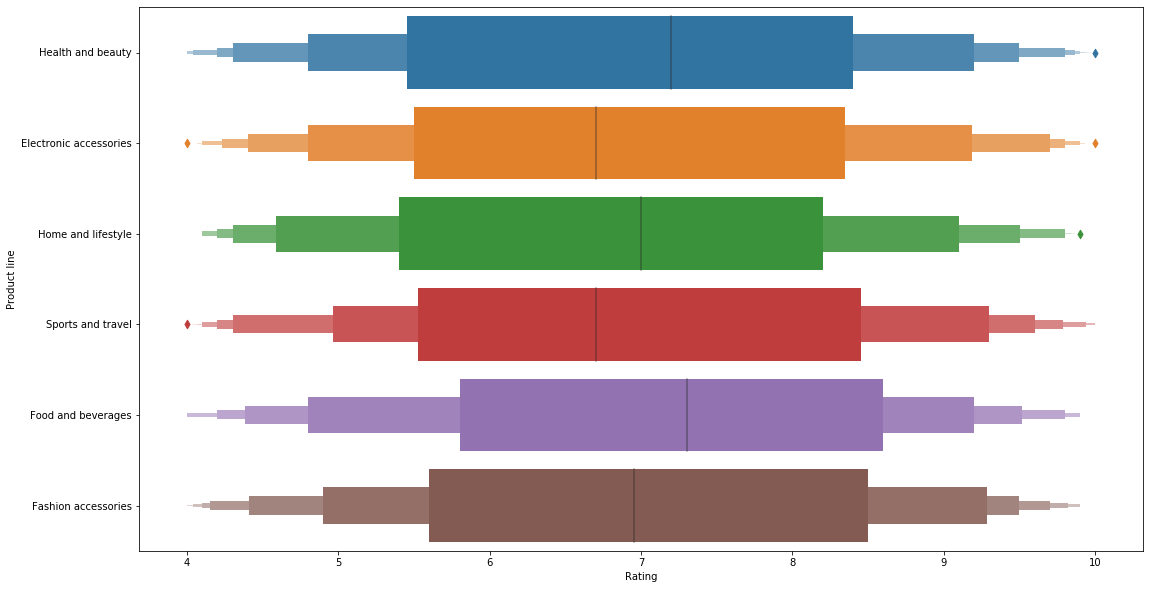

In [0]:
sns.boxenplot(y = 'Product line', x = 'Rating', data=retail_data )

In [0]:
retail_data.insert(11,'Day_of_Week',pd.to_datetime(retail_data['Date']).dt.weekday_name)

In [0]:
retail_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10


In [0]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

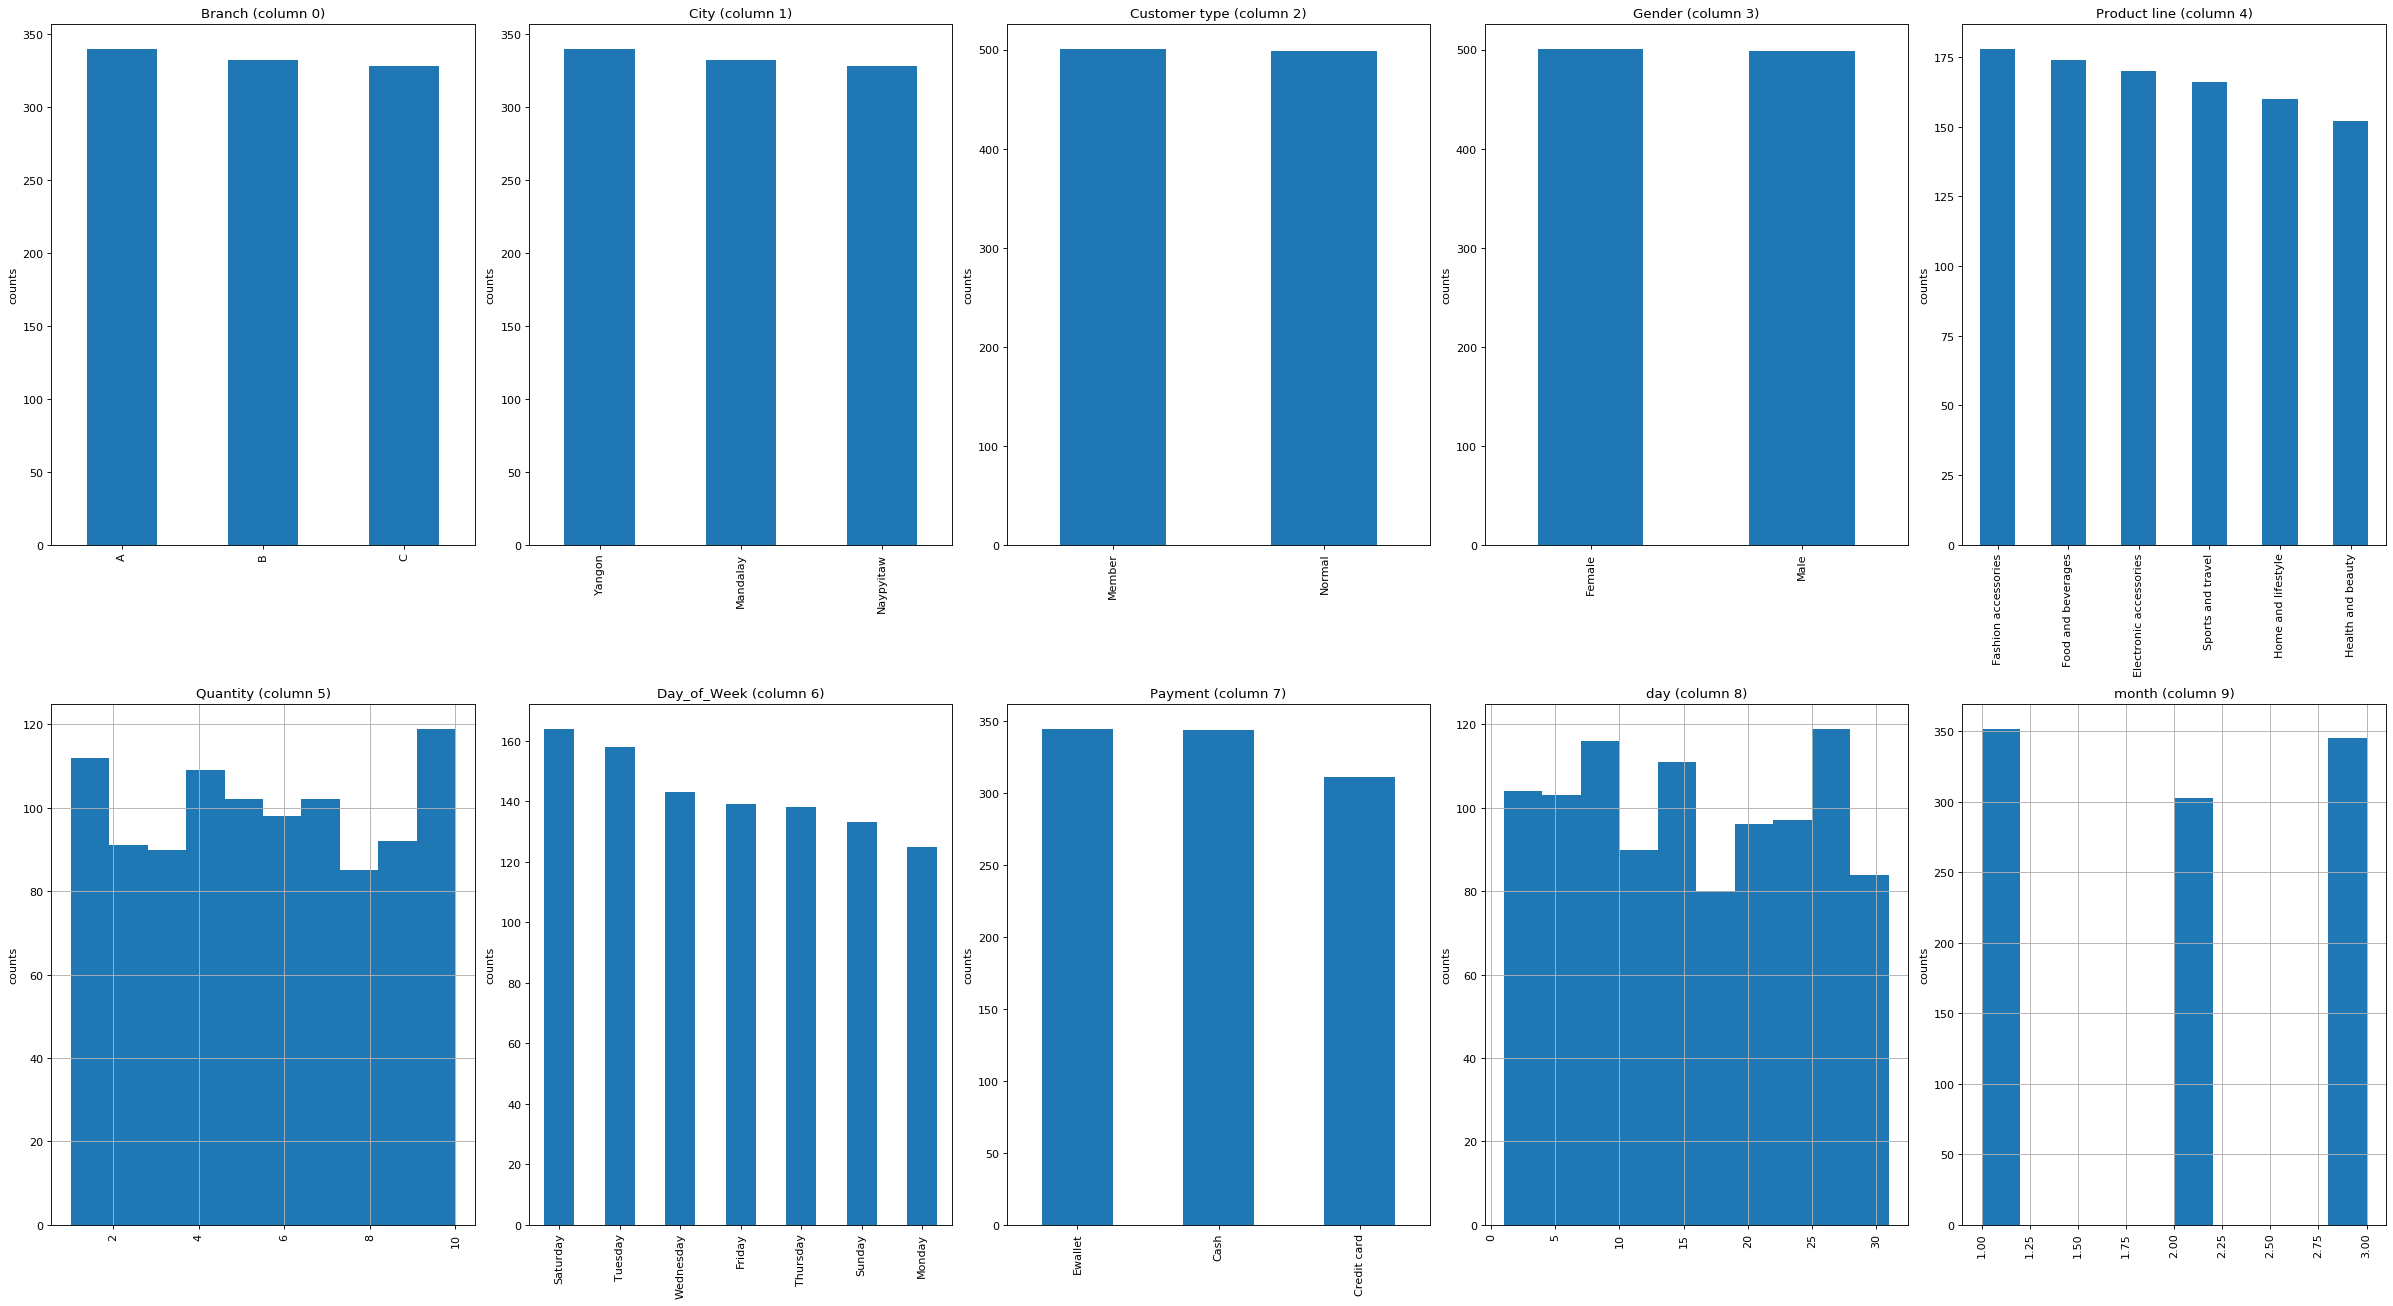

In [0]:
plotPerColumnDistribution(retail_data, 10, 5)

In [0]:
def plot_grpah(figsize=(10,8), figtype=None, y=None, x=None, hue=None, labels=None, save=False):
   
    # plotting figure
    fig = plt.figure(figsize=figsize)
    
    if figtype == 'pointplot':
        ax = sns.pointplot(y=y, x=x, hue=hue)
    elif figtype == 'boxplot':
        ax = sns.boxplot(y=y, x=x, hue=hue)
    elif figtype == 'barplot':
        ax = sns.barplot(y=y, x=x, hue=hue, ci=False)
    else:
        print('figtype must be specified')
    
    # setting up labels
    fig = plt.title(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_xlabel(labels[2])
    fig = plt.legend(title=labels[3], loc='upper left', bbox_to_anchor=(1.0, 0.5), ncol=1)
    
    # exporting and showing figure
    if save == True:
        plt.savefig(fname=labels[0].replace(" ", "_").lower(), dpi=72, bbox_inches='tight')       
    
    plt.show()

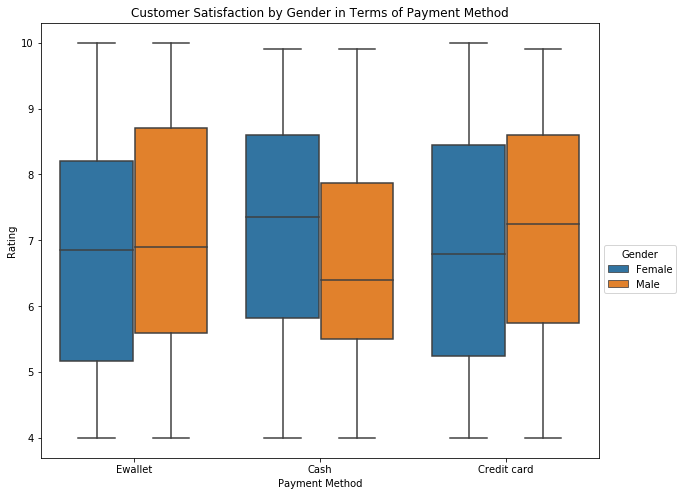

In [0]:
plot_grpah(
    figtype='boxplot', y=retail_data.Rating, x=retail_data.Payment, hue=retail_data.Gender, save=True,
    labels=['Customer Satisfaction by Gender in Terms of Payment Method', 'Rating', 'Payment Method', 'Gender']
)

The graph shows that male customers tend to give higher satisfaction ratings for shopping experience when they pay using e-wallets or credit cards. Female customers, contrarily, tend to give higher satisfaction ratings for shopping experience when paying in cash.

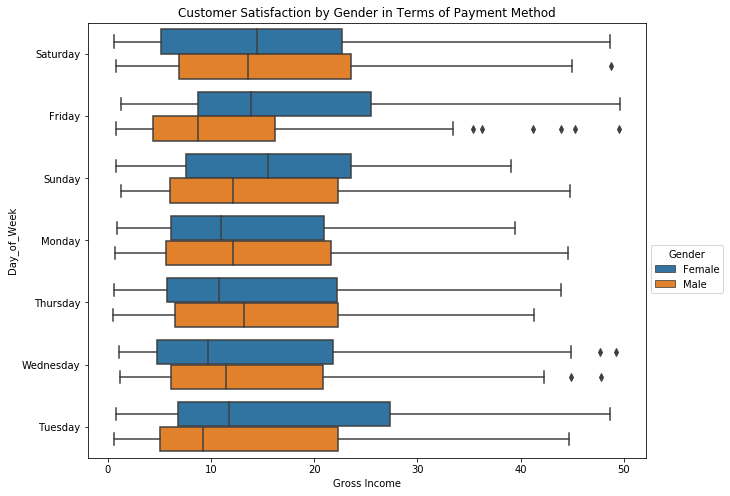

In [0]:
plot_grpah(
    figtype='boxplot', y=retail_data.Day_of_Week, x=retail_data['gross income'], hue=retail_data.Gender, save=True,
    labels=['Customer Satisfaction by Gender in Terms of Payment Method', 'Day_of_Week', 'Gross Income', 'Gender']
)

Here the females tend to buy stuff more in Tuesday than on any other day. Whereas the males shopping doesn't seem to change much except for Friday.

In [0]:
import sys

In [0]:
if(len(sys.argv) < 2): #if no file location is provided then show error message and exit
    print('Provide File Location')
    sys.exit()

In [0]:
fil = sys.argv[1]
csvfilename = open("supermarket_sales - Sheet1.csv", 'r').readlines()
#store header values
header = csvfilename[0] 
#remove header from list
csvfilename.pop(0) 
file = 1
#Number of lines to be written in new file
record_per_file = 700

for j in range(len(csvfilename)):
    if j % record_per_file == 0:
        write_file = csvfilename[j:j+record_per_file]
        #adding header at the start of the write_file
        write_file.insert(0, header)
        #write in file
        open(str(fil)+ str(file) + '.csv', 'w+').writelines(write_file)
        file += 1

In [0]:
train_data = pd.read_csv("-f1.csv")
test_data = pd.read_csv("-f2.csv")

In [0]:
train_data = train_data[['Gender', 'Product line', 'City', 'Branch', 'Customer type', 'Unit price', 'Quantity', 'Total', 'Payment', 'gross income', 'Rating']]


In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,Female,Health and beauty,Yangon,A,Member,74.69,7,548.9715,Ewallet,26.1415,9.1
1,Female,Electronic accessories,Naypyitaw,C,Normal,15.28,5,80.2200,Cash,3.8200,9.6
2,Male,Home and lifestyle,Yangon,A,Normal,46.33,7,340.5255,Credit card,16.2155,7.4
3,Male,Health and beauty,Yangon,A,Member,58.22,8,489.0480,Ewallet,23.2880,8.4
4,Male,Sports and travel,Yangon,A,Normal,86.31,7,634.3785,Ewallet,30.2085,5.3


In [0]:
#train_data['date'] = pd.to_datetime(train_data['Date'])
#train_data['Time'] = pd.to_datetime(train_data['Time'])

In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,Female,Health and beauty,Yangon,A,Member,74.69,7,548.9715,Ewallet,26.1415,9.1
1,Female,Electronic accessories,Naypyitaw,C,Normal,15.28,5,80.2200,Cash,3.8200,9.6
2,Male,Home and lifestyle,Yangon,A,Normal,46.33,7,340.5255,Credit card,16.2155,7.4
3,Male,Health and beauty,Yangon,A,Member,58.22,8,489.0480,Ewallet,23.2880,8.4
4,Male,Sports and travel,Yangon,A,Normal,86.31,7,634.3785,Ewallet,30.2085,5.3


In [0]:
test_data = test_data[['Gender', 'Product line', 'City', 'Branch', 'Customer type', 'Unit price', 'Quantity', 'Total', 'Payment', 'gross income', 'Rating']]


In [0]:
test_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,Female,Fashion accessories,Naypyitaw,C,Normal,60.41,8,507.4440,Ewallet,24.1640,9.6
1,Male,Food and beverages,Mandalay,B,Normal,32.32,3,101.8080,Credit card,4.8480,4.3
2,Female,Fashion accessories,Mandalay,B,Member,19.77,10,207.5850,Credit card,9.8850,5.0
3,Male,Health and beauty,Mandalay,B,Member,80.47,9,760.4415,Cash,36.2115,9.2
4,Female,Home and lifestyle,Mandalay,B,Member,88.39,9,835.2855,Cash,39.7755,6.3


In [0]:
#test_data['date'] = pd.to_datetime(test_data['Date'])
#test_data['Time'] = pd.to_datetime(test_data['Time'])

In [0]:
gen_map = {"Male" : 0, "Female" : 1}
for i in [train_data, test_data]:
  i['Gender'] = i['Gender'].map(gen_map)

In [0]:
gen_map = {"Normal" : 0, "Member" : 1}
for i in [train_data, test_data]:
  i['Customer type'] = i['Customer type'].map(gen_map)

In [0]:
gen_map = {"Yangon" : 1, "Naypyitaw" : 2, "Mandalay" : 3}
for i in [train_data, test_data]:
  i['City'] = i['City'].map(gen_map)

In [0]:
gen_map = {'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6}
for i in [train_data, test_data]:
  i['Product line'] = i['Product line'].map(gen_map)

In [0]:
gen_map = {'A':1, 'B':2, 'C':3}
for i in [train_data, test_data]:
  i['Branch'] = i['Branch'].map(gen_map)

In [0]:
gen_map = {'Ewallet':1, 'Cash':2, 'Credit card':3}
for i in [train_data, test_data]:
  i['Payment'] = i['Payment'].map(gen_map)

In [0]:
dummy_retail = retail_data

In [0]:
dummy_retail['City_label'] = dummy_retail['City']
cleanup_nums = {"City_label": {"Yangon" : 1, "Naypyitaw" : 2, "Mandalay" : 3}}
dummy_retail.replace(cleanup_nums, inplace=True)
dummy_retail.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1


In [0]:
dummy_retail['Product_line_label'] = dummy_retail['Product line']
cleanup_nums = {"Product_line_label": {'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6}}
dummy_retail.replace(cleanup_nums, inplace=True)
dummy_retail.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3


In [0]:
dummy_retail['Branch_label'] = dummy_retail['Branch']
cleanup_nums = {"Branch_label": {"A" : 1, "B" : 2, "C" : 3}}
dummy_retail.replace(cleanup_nums, inplace=True)
dummy_retail.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label,Branch_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3,1


In [0]:
dummy_retail['Gender_label'] = dummy_retail['Gender']
cleanup_nums = {"Gender_label": {"Male" : 1, "Female" : 0}}
dummy_retail.replace(cleanup_nums, inplace=True)
dummy_retail.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label,Branch_label,Gender_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6,1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1,3,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4,1,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3,1,1


In [0]:
dummy_retail['Customer_type_label'] = dummy_retail['Customer type']
cleanup_nums = {"Customer_type_label": {"Member" : 1, "Normal" : 0}}
dummy_retail.replace(cleanup_nums, inplace=True)
dummy_retail.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label,Branch_label,Gender_label,Customer_type_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6,1,0,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1,3,0,0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4,1,1,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6,1,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3,1,1,0


In [0]:
dummy_retail['Payment_label'] = dummy_retail['Payment']
cleanup_nums = {"Payment_label": {'Ewallet':1, 'Cash':2, 'Credit card':3}}
dummy_retail.replace(cleanup_nums, inplace=True)
dummy_retail.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label,Branch_label,Gender_label,Customer_type_label,Payment_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6,1,0,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1,3,0,0,2
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4,1,1,0,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6,1,1,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3,1,1,0,1


In [0]:
train_retail = dummy_retail[['Gender_label', 'Product_line_label', 'City_label', 'Branch_label', 'Customer_type_label', 'Unit price', 'Quantity', 'Total', 'Payment_label', 'gross income', 'Rating']]

In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,1,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1
1,1,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6
2,0,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4
3,0,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4
4,0,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3


In [0]:
test_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,1,5,2,3,0,60.41,8,507.4440,1,24.1640,9.6
1,0,2,3,2,0,32.32,3,101.8080,3,4.8480,4.3
2,1,5,3,2,1,19.77,10,207.5850,3,9.8850,5.0
3,0,6,3,2,1,80.47,9,760.4415,2,36.2115,9.2
4,1,4,3,2,1,88.39,9,835.2855,2,39.7755,6.3


In [0]:
target = 'Product line'
IDcol = ['City', 'Payment', 'Customer type', 'Gender', 'gross income']

In [0]:
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [0]:
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Remember the target had been normalized
    Sq_train = (dtrain[target])**2
#Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],Sq_train , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

In [0]:
#train_data = train_data.reset_index()

In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,1,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1
1,1,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6
2,0,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4
3,0,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4
4,0,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3


In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,1,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1
1,1,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6
2,0,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4
3,0,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4
4,0,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3


In [0]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_data.columns.drop(['Product line', 'City', 'Payment', 'Customer type', 'Gender', 'gross income'])
modelfit(LR, train_data, test_data, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 16.36
CV Score : Mean - 11.94 | Std - 1.174 | Min - 10.01 | Max - 13.76


In [0]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_data, test_data, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 16.36
CV Score : Mean - 11.92 | Std - 1.172 | Min - 10 | Max - 13.76


In [0]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_data, test_data, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 16.32
CV Score : Mean - 11.98 | Std - 1.033 | Min - 10.36 | Max - 13.55


In [0]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_data, test_data, predictors, target, IDcol, 'RF.csv')


Model Report
RMSE : 16.35
CV Score : Mean - 11.99 | Std - 1.166 | Min - 9.948 | Max - 13.84


In [0]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_data[predictors], train_data[target], early_stopping_rounds=5, 
             eval_set=[(test_data[predictors], test_data[target])], verbose=False)

[05:25:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
#Predict training set:
train_df_predictions = my_model.predict(train_data[predictors])
# make predictions
predictions = my_model.predict(test_data[predictors])
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_data[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_data[target]).values, train_df_predictions)))
IDcol.append(target)
submission = pd.DataFrame({ x: test_data[x] for x in IDcol})
submission.to_csv("merda.csv", index=False)

Mean Absolute Error : 0.2603762529769253
RMSE : 1.545


In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating
0,1,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1
1,1,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6
2,0,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4
3,0,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4
4,0,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3


In [0]:
train_data[['Gender', 'City']]

,Gender,City
0,1,1
1,1,2
2,0,1
3,0,1
4,0,1
...,...,...
695,1,1
696,1,1
697,0,3
698,0,1


In [0]:
#sample = train_data['Gender', 'Payment', 'Rating', 'City']

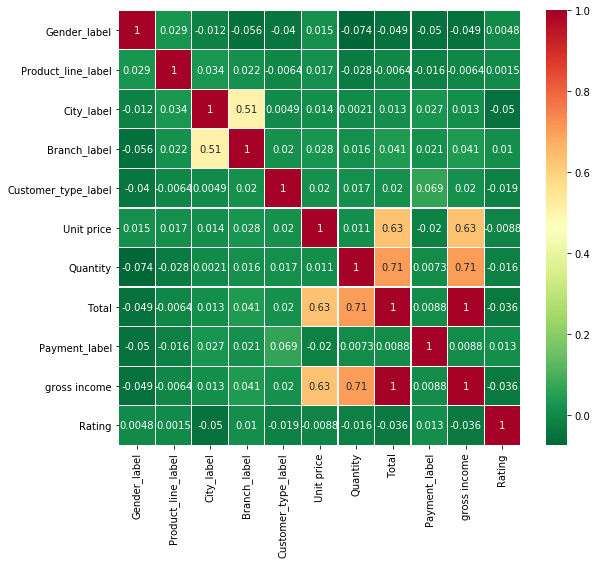

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

corrmat = train_retail.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="RdYlGn_r", linewidths = 0.1, annot=True) 

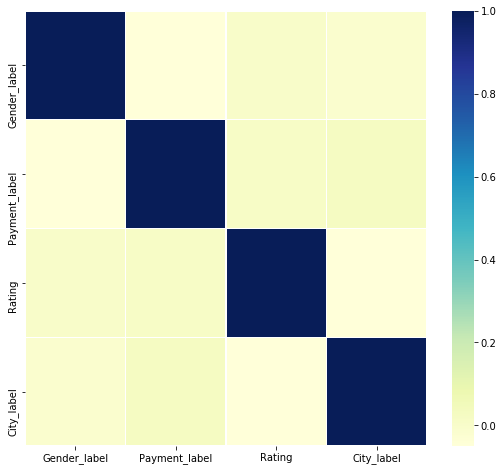

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns

corrmat = train_retail[['Gender_label', 'Payment_label', 'Rating', 'City_label']].corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [0]:
train_data['cnt'] = np.ones(len(train_data))

In [0]:
dummy_trian = train_retail

In [0]:
dummy_trian['cnt'] = np.ones(len(dummy_trian))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
g = train_data.groupby(['Product line', 'City']).count()[['cnt']].reset_index().replace(np.nan, 0)

In [0]:
h = dummy_trian.groupby(['Product_line_label', 'City_label']).count()[['cnt']].reset_index().replace(np.nan, 0)

In [0]:
g

,Product line,City,cnt
0,1,1,41
1,1,2,41
2,1,3,30
3,2,1,39
4,2,2,52
5,2,3,34
6,3,1,44
7,3,2,34
8,3,3,49
9,4,1,50


In [0]:
h

,Product_line_label,City_label,cnt
0,1,1,60
1,1,2,55
2,1,3,55
3,2,1,58
4,2,2,66
5,2,3,50
6,3,1,59
7,3,2,45
8,3,3,62
9,4,1,65


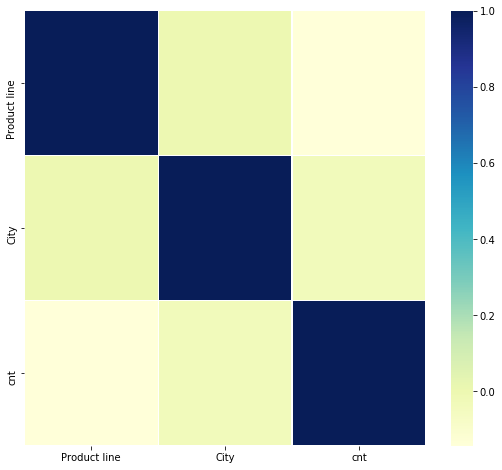

In [0]:
corrmat = g.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

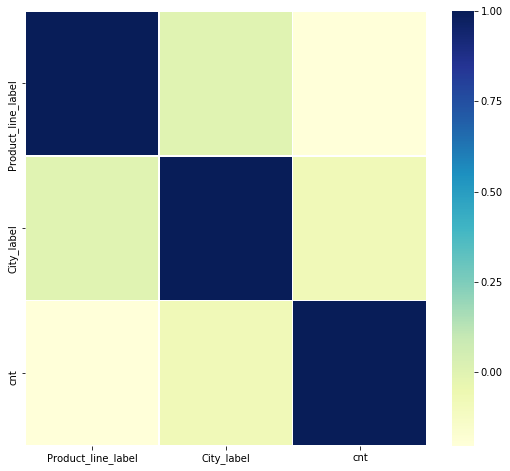

In [0]:
corrmat = h.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'], size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )


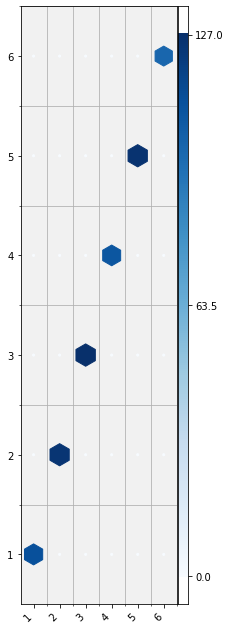

In [0]:
bin_labels = ['1', '2', '3', '4', '5', '6']
train_data['product_group'] = pd.cut(
    train_data['Product line'],
    bins=[0, 1, 2, 3, 4, 5, train_data['Product line'].max() ],
    labels=bin_labels
)

train_data['cnt'] = np.ones(len(train_data))
g = train_data.groupby(['product_group', 'Product line']).count()[['cnt']].reset_index().replace(np.nan, 0)

plt.figure(figsize=(3, 11))
heatmap(
    x=g['product_group'],
    y=g['Product line'],
    size=g['cnt'],
    color=g['cnt'],
    marker='h',
    x_order=bin_labels
)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


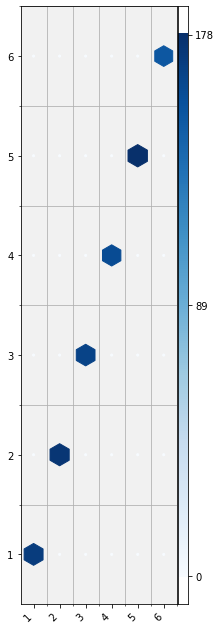

In [0]:
bin_labels = ['1', '2', '3', '4', '5', '6']
dummy_trian['product_group'] = pd.cut(
    dummy_trian['Product_line_label'],
    bins=[0, 1, 2, 3, 4, 5, dummy_trian['Product_line_label'].max() ],
    labels=bin_labels
)

train_data['cnt'] = np.ones(len(train_data))
h = dummy_trian.groupby(['product_group', 'Product_line_label']).count()[['cnt']].reset_index().replace(np.nan, 0)

plt.figure(figsize=(3, 11))
heatmap(
    x=h['product_group'],
    y=h['Product_line_label'],
    size=h['cnt'],
    color=h['cnt'],
    marker='h',
    x_order=bin_labels
)

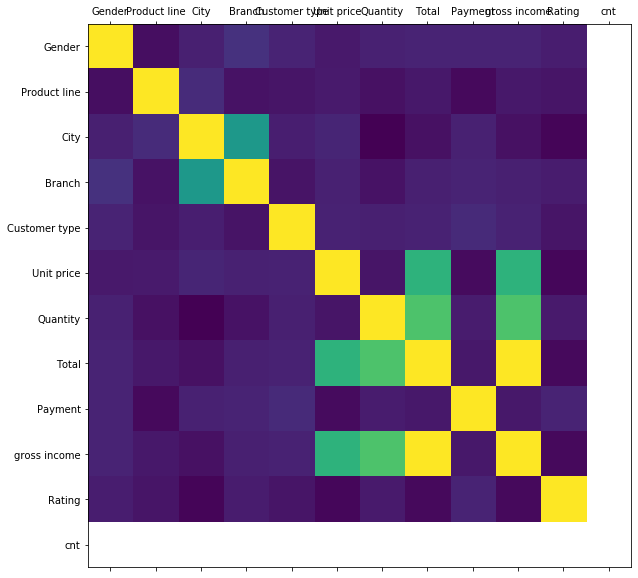

In [0]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(train_data)

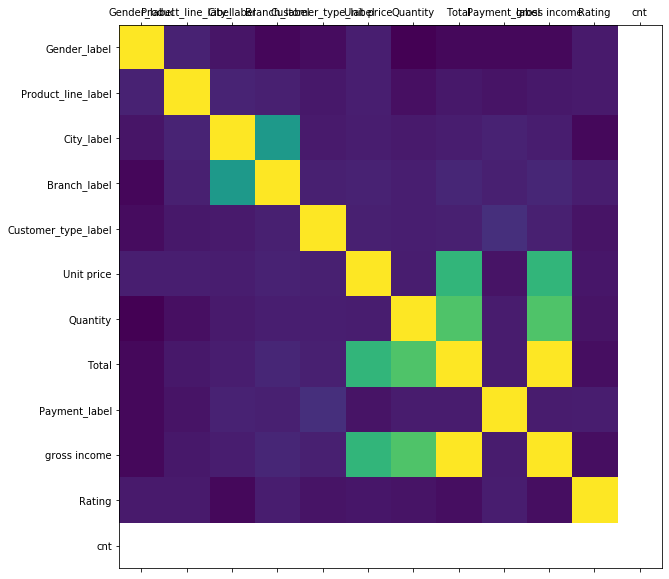

In [0]:
plot_corr(dummy_trian)

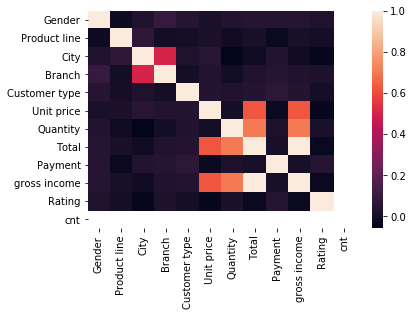

In [0]:
import seaborn as sns
corr = train_data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

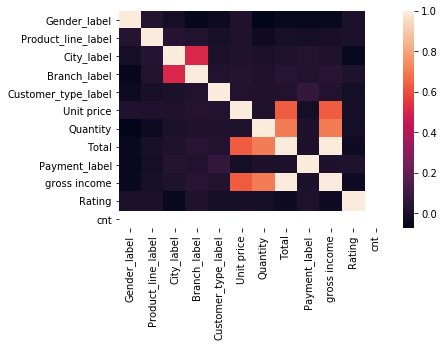

In [0]:
import seaborn as sns
corr = dummy_trian.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating,cnt,product_group
0,1,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,1,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,0,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,0,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,0,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
import seaborn as sns

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3,'
' 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


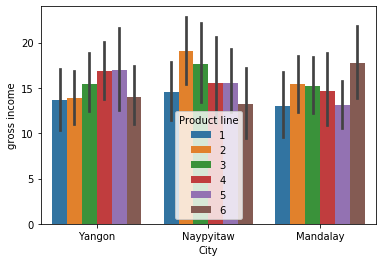

In [0]:
ax = sns.barplot(y=train_data['gross income'], x=retail_data['City'], hue=train_data['Product line'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3,'\n' 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


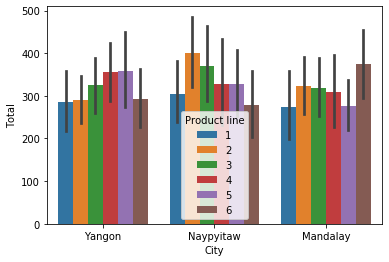

In [0]:
ax = sns.barplot(y=train_data['Total'], x=retail_data['City'], hue=train_data['Product line'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3,'
' 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


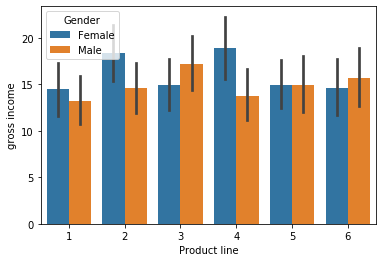

In [0]:
ax = sns.barplot(y=train_data['gross income'], hue=retail_data['Gender'], x=train_data['Product line'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3,'\n' 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


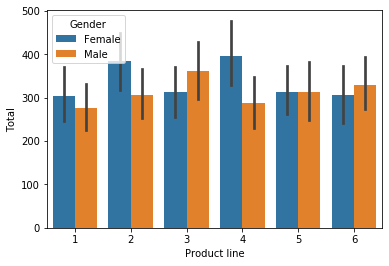

In [0]:
ax = sns.barplot(y=train_data['Total'], hue=retail_data['Gender'], x=train_data['Product line'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


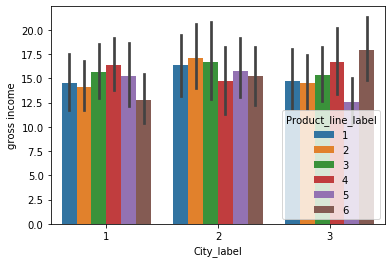

In [0]:
ax = sns.barplot(y=dummy_trian['gross income'], x=dummy_trian['City_label'], hue=dummy_trian['Product_line_label'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


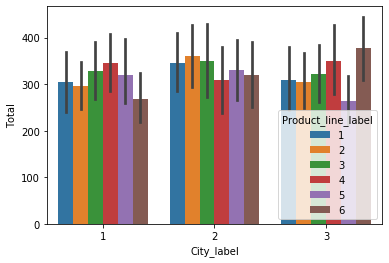

In [0]:
ax = sns.barplot(y=dummy_trian['Total'], x=dummy_trian['City_label'], hue=dummy_trian['Product_line_label'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


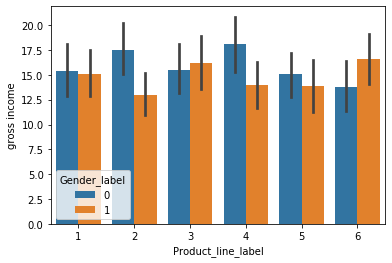

In [0]:
ax = sns.barplot(y=dummy_trian['gross income'], hue=dummy_trian['Gender_label'], x=dummy_trian['Product_line_label'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6


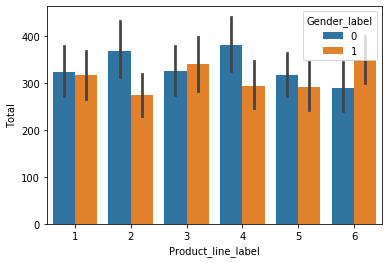

In [0]:
ax = sns.barplot(y=dummy_trian['Total'], hue=dummy_trian['Gender_label'], x=dummy_trian['Product_line_label'])
print("'Electronic accessories':1, 'Food and beverages':2, 'Sports and travel':3, 'Home and lifestyle':4, 'Fashion accessories':5, 'Health and beauty':6")

In [0]:
retail_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label,Branch_label,Gender_label,Customer_type_label,Payment_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6,1,0,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1,3,0,0,2
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4,1,1,0,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6,1,1,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3,1,1,0,1


In [0]:
train_data.head()

,Gender,Product line,City,Branch,Customer type,Unit price,Quantity,Total,Payment,gross income,Rating,cnt,product_group
0,1,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,1,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,0,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,0,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,0,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
dummy_trian.head()

,Gender_label,Product_line_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
0,0,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,0,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,1,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,1,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,1,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
X = dummy_trian.drop('Product_line_label',axis=1)
y = dummy_trian['Product_line_label']

In [0]:
import sklearn
import keras

In [0]:
sklearn.preprocessing.normalize(X, norm='l2',return_norm=False)

array([[0.        , 0.00180245, 0.00180245, ..., 0.01640227, 0.00180245,
        0.01081468],
       [0.        , 0.0242189 , 0.03632835, ..., 0.11625071, 0.01210945,
        0.01210945],
       [0.00290497, 0.00290497, 0.00290497, ..., 0.02149676, 0.00290497,
        0.01161987],
       ...,
       [0.02128475, 0.02128475, 0.02128475, ..., 0.16389254, 0.02128475,
        0.04256949],
       [0.01044775, 0.01044775, 0.01044775, ..., 0.04283578, 0.01044775,
        0.041791  ],
       [0.        , 0.00152414, 0.00152414, ..., 0.01005935, 0.00152414,
        0.00762072]])

In [0]:
np.linalg.norm(keras.utils.normalize([[1,2,3],[2,3,4]],axis=0)[:,0])

0.9999999999999999

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression

#training the train data
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Train result:", log_model.score(X_train, y_train))

# predicting the prices on the test set
print("Test result:", log_model.score(X_test, y_test))


Train result: 0.77
Test result: 0.725


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
from sklearn.linear_model import LinearRegression

#training the train data
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
print("Train result:", lin_model.score(X_train, y_train))

# predicting the prices on the test set
print("Test result:", lin_model.score(X_test,y_test))

Train result: 1.0
Test result: 1.0


In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print("Train result:", knn.score(X_train,y_train))
print("Test result:", knn.score(X_test,y_test))

Train result: 0.36125
Test result: 0.18


In [0]:
prediction_probability = log_model.predict_proba(X_test)[:,1]

In [0]:
X_train.head()

,Gender_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
687,1,1,1,1,63.56,10,667.3800,2,31.7800,4.3,1.0,4
500,1,3,2,1,73.97,1,77.6685,3,3.6985,5.4,1.0,3
332,1,1,1,0,77.02,5,404.3550,2,19.2550,5.5,1.0,5
979,0,3,2,0,67.77,1,71.1585,3,3.3885,6.5,1.0,2
817,1,1,1,0,33.88,8,284.5920,1,13.5520,9.6,1.0,2


Text(0, 0.5, 'y')

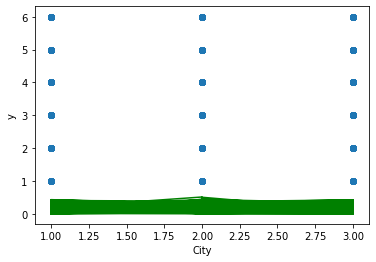

In [0]:
plt.scatter(X_test['City_label'], y_test)
plt.plot(X_test['City_label'], prediction_probability, color='green')
plt.xlabel('City')
plt.ylabel('y')

In [0]:
X_train.dtypes

Gender_label              int64
City_label                int64
Branch_label              int64
Customer_type_label       int64
Unit price              float64
Quantity                  int64
Total                   float64
Payment_label             int64
gross income            float64
Rating                  float64
cnt                     float64
product_group          category
dtype: object

In [0]:
X_train["product_group"]=X_train["product_group"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X_test["product_group"]=X_test["product_group"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
X.head()

,Gender_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
0,0,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,0,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,1,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,1,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,1,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
X_train.head()

,Gender_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
687,1,1,1,1,63.56,10,667.3800,2,31.7800,4.3,1.0,4
500,1,3,2,1,73.97,1,77.6685,3,3.6985,5.4,1.0,3
332,1,1,1,0,77.02,5,404.3550,2,19.2550,5.5,1.0,5
979,0,3,2,0,67.77,1,71.1585,3,3.3885,6.5,1.0,2
817,1,1,1,0,33.88,8,284.5920,1,13.5520,9.6,1.0,2


In [0]:
X["product_group"]=X["product_group"].astype(int)

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [0]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [0]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[05:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 1.792337


In [0]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[05:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.159138,0.037160,3.158474,0.087767
1,2.939491,0.032079,2.938935,0.088409
2,2.717894,0.017839,2.722453,0.123060
3,2.517625,0.035959,2.518941,0.120414
4,2.312205,0.081061,2.314688,0.157189


In [0]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.639335
Name: test-rmse-mean, dtype: float64


In [0]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[05:25:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


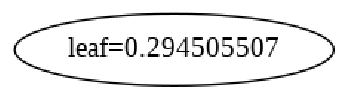

In [0]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

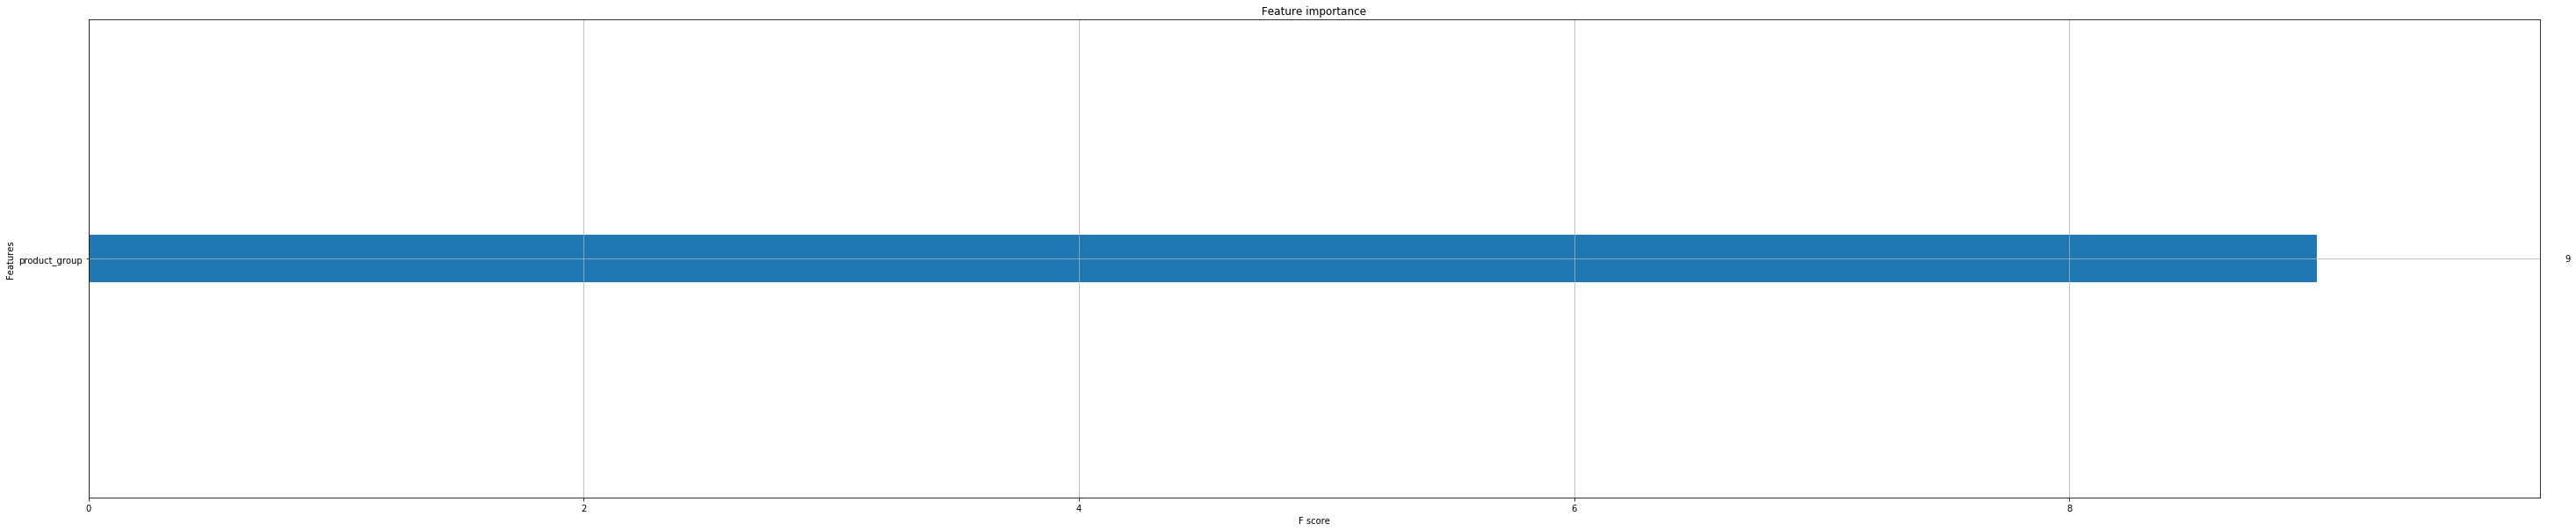

In [0]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [0]:
retail_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Day_of_Week,Time,Payment,cogs,gross margin percentage,gross income,Rating,date,day,month,year,Hour,City_label,Product_line_label,Branch_label,Gender_label,Customer_type_label,Payment_label
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Saturday,2019-12-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019-01-05,5,1,2019,13,1,6,1,0,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Friday,2019-12-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019-03-08,8,3,2019,10,2,1,3,0,0,2
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Sunday,2019-12-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,2019-03-03,3,3,2019,13,1,4,1,1,0,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Sunday,2019-12-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,2019-01-27,27,1,2019,20,1,6,1,1,1,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Friday,2019-12-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,2019-02-08,8,2,2019,10,1,3,1,1,0,1


In [0]:
dummy_trian.head()

,Gender_label,Product_line_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
0,0,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,0,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,1,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,1,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,1,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
train_retail.head()

,Gender_label,Product_line_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
0,0,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,0,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,1,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,1,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,1,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
train_retail.dtypes

Gender_label              int64
Product_line_label        int64
City_label                int64
Branch_label              int64
Customer_type_label       int64
Unit price              float64
Quantity                  int64
Total                   float64
Payment_label             int64
gross income            float64
Rating                  float64
cnt                     float64
product_group          category
dtype: object

In [0]:
dummy_trian["product_group"]=dummy_trian["product_group"].astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
dummy_trian.head()

,Gender_label,Product_line_label,City_label,Branch_label,Customer_type_label,Unit price,Quantity,Total,Payment_label,gross income,Rating,cnt,product_group
0,0,6,1,1,1,74.69,7,548.9715,1,26.1415,9.1,1.0,6
1,0,1,2,3,0,15.28,5,80.2200,2,3.8200,9.6,1.0,1
2,1,4,1,1,0,46.33,7,340.5255,3,16.2155,7.4,1.0,4
3,1,6,1,1,1,58.22,8,489.0480,1,23.2880,8.4,1.0,6
4,1,3,1,1,0,86.31,7,634.3785,1,30.2085,5.3,1.0,3


In [0]:
train_retail = train_retail.drop(['cnt', 'product_group'], axis=1)

In [0]:
X_val = train_retail.drop(['Product_line_label'], axis=1)
y_val = train_retail['Product_line_label']

In [0]:
dtrain = xgb.DMatrix(X_val, label = y_val)
dtest = xgb.DMatrix(X_val, label = y_val)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [0]:
dtrain.feature_names

['Gender_label',
 'City_label',
 'Branch_label',
 'Customer_type_label',
 'Unit price',
 'Quantity',
 'Total',
 'Payment_label',
 'gross income',
 'Rating']

In [0]:
param = {'max_depth': 2, 'eta': 1, 'objective': 'reg:linear'}
param['nthread'] = 4
param['eval_metric'] = 'rmse'

In [0]:
evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [0]:
num_round = 10
bst = xgb.train(param, dtrain, num_round, evallist)

[05:25:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	eval-rmse:1.68674	train-rmse:1.68674
[1]	eval-rmse:1.67245	train-rmse:1.67245
[2]	eval-rmse:1.66014	train-rmse:1.66014
[3]	eval-rmse:1.65095	train-rmse:1.65095
[4]	eval-rmse:1.64323	train-rmse:1.64323
[5]	eval-rmse:1.63393	train-rmse:1.63393
[6]	eval-rmse:1.62812	train-rmse:1.62812
[7]	eval-rmse:1.61442	train-rmse:1.61442
[8]	eval-rmse:1.60476	train-rmse:1.60476
[9]	eval-rmse:1.59952	train-rmse:1.59952


In [0]:
#bst.save_model('0001.model')

In [0]:
#data = train_data
#dtest = xgb.DMatrix(data)
ypred = bst.predict(dtest)

In [0]:
dtest.feature_names

['Gender_label',
 'City_label',
 'Branch_label',
 'Customer_type_label',
 'Unit price',
 'Quantity',
 'Total',
 'Payment_label',
 'gross income',
 'Rating']

In [0]:
ypred

array([3.5197508, 2.3358939, 3.8056185, 4.0533977, 3.650584 , 3.650584 ,
       3.2642589, 3.2176702, 3.0574741, 3.2642589, 4.663258 , 3.1106632,
       3.4015243, 3.8056185, 4.321247 , 3.8393395, 3.7186718, 3.1156566,
       3.6493032, 3.7614284, 3.8393395, 3.8393395, 3.3155982, 3.0016308,
       3.196171 , 3.8056185, 3.3478813, 3.5812154, 3.1813219, 3.5147574,
       3.8393395, 2.7267175, 3.3485034, 3.8393395, 1.928369 , 3.7510831,
       3.6493032, 3.7186718, 4.0533977, 3.8056185, 3.6829953, 3.2642589,
       3.5728195, 3.080703 , 3.0261946, 3.5812154, 4.0533977, 3.1800318,
       3.1106632, 3.080703 , 3.683229 , 3.4015243, 3.729682 , 4.9040527,
       4.020089 , 3.683229 , 4.255003 , 3.3989396, 2.5483367, 3.4015243,
       2.3667195, 3.6493032, 3.653504 , 3.4839323, 3.5812154, 3.7477071,
       3.5033042, 4.3193364, 3.0138955, 4.6449385, 2.6808095, 3.384064 ,
       3.6596484, 3.5812154, 3.2176702, 3.136285 , 3.8056185, 2.845424 ,
       2.7964137, 2.7256188, 4.8518853, 3.196171 , 

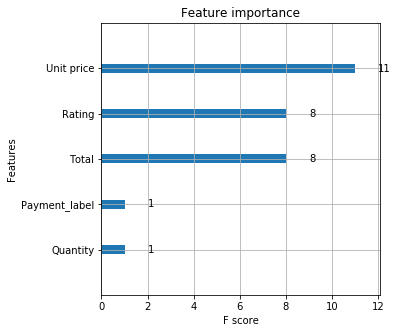

In [0]:
xgb.plot_importance(bst)

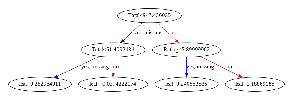

In [0]:
xgb.plot_tree(bst, num_trees=6)

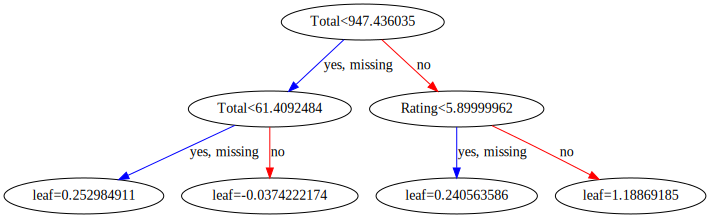

In [0]:
xgb.to_graphviz(bst, num_trees=6)

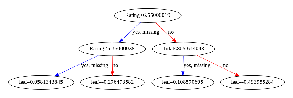

In [0]:
xgb.plot_tree(bst, num_trees=5)
plt.rcParams['figure.figsize'] = [18, 10]
plt.show()

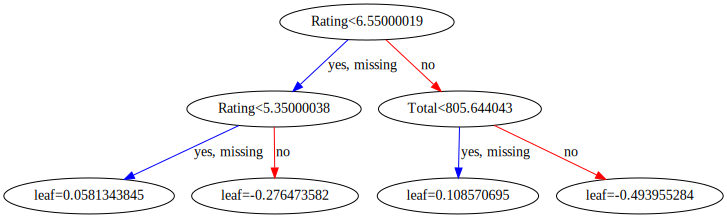

In [0]:
xgb.to_graphviz(bst, num_trees=5)

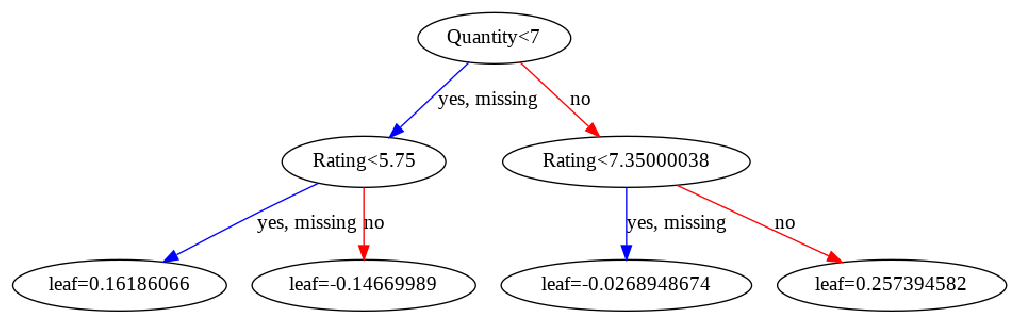

In [0]:
xgb.plot_tree(bst, num_trees=4)

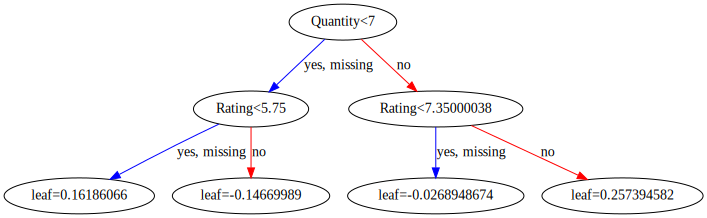

In [0]:
xgb.to_graphviz(bst, num_trees=4)

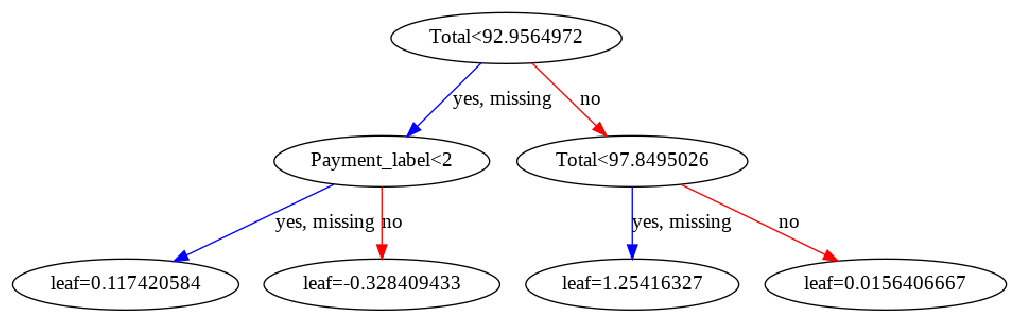

In [0]:
xgb.plot_tree(bst, num_trees=7)

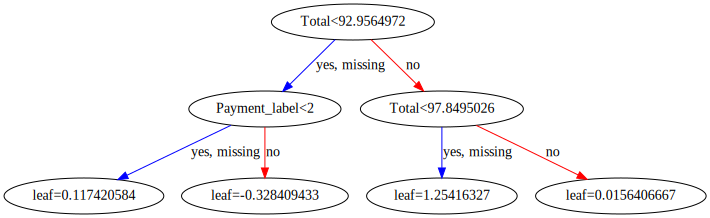

In [0]:
xgb.to_graphviz(bst, num_trees=7)